In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sdv.tabular import CopulaGAN

from zca import zca

from copulas.datasets import sample_trivariate_xyz
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_3d
from scipy import stats


In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/thistleknot/Python-Stock/master/data/raw/states.csv")
old_data = data.set_index("States")

In [5]:

copulaGAN_model = CopulaGAN()
copula_model = GaussianMultivariate()

copulaGAN_model.fit(old_data)
copula_model.fit(old_data)

zca = zca.ZCA()
zca.fit(old_data)


ZCA()

In [6]:
#model.save('copulaGAN.pkl')
#loaded = sdv.tabular.CopulaGAN().load('copulaGAN.pkl')

In [8]:
src = stats.spearmanr(old_data)

In [20]:
pd.DataFrame([s[9] for s in src])

,0,1,2,3,4,5,6,7,8,9
0,0.233452,0.111343,-0.422898,0.466119,0.246537,-0.201037,0.124970,0.463734,0.116351,1.0
1,0.102756,0.441418,0.002216,0.000646,0.084359,0.161533,0.387194,0.000694,0.421021,0.0


In [26]:
#new_data = loaded.sample(2000)
# Sample synthetic data
#synthetic_data = copula_model.sample(2000)

copulaGAN_data = copulaGAN_model.sample(2000,)


copula_data = copula_model.sample(2000)
zca_transformed = pd.DataFrame(zca.inverse_transform(np.random.normal(size=(2000, len(old_data.columns)))),columns=old_data.columns)

# Load a dataset with 3 columns that are not independent
#real_data = sample_trivariate_xyz()

"""
# Fit a gaussian copula to the data
copula = GaussianMultivariate()
copula.fit(data.set_index("States"))

# Sample synthetic data
synthetic_data = copula.sample(len(data)*1000)
"""

# Plot the real and the synthetic data to compare
#compare_3d(data, synthetic_data)

'\n# Fit a gaussian copula to the data\ncopula = GaussianMultivariate()\ncopula.fit(data.set_index("States"))\n\n# Sample synthetic data\nsynthetic_data = copula.sample(len(data)*1000)\n'

In [ ]:
old_data.describe()

,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University,Unemployed,Income,Population
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,5.000000e+01
mean,12.732000,6.830000,81.96200,407.480000,260.276000,1.40440,26.940000,5.270000,51985.100000,6.016154e+06
std,2.939002,1.338786,11.97458,183.633868,64.363415,0.38654,4.761152,1.253933,8592.657934,6.663772e+06
min,7.600000,4.700000,29.70000,118.000000,168.800000,0.76000,17.100000,3.000000,37790.000000,5.232260e+05
25%,10.450000,5.725000,76.15000,278.250000,218.425000,1.14000,24.025000,4.400000,46161.250000,1.779632e+06
50%,12.400000,6.850000,84.55000,345.500000,249.050000,1.37500,26.200000,5.300000,50173.000000,4.313980e+06
75%,14.700000,7.750000,89.85000,520.000000,274.800000,1.62000,29.825000,6.275000,56903.000000,6.490796e+06
max,21.200000,10.600000,96.40000,788.000000,469.000000,2.45000,38.100000,8.400000,70545.000000,3.618591e+07


In [ ]:
copulaGAN_model.get_distributions()

{'Poverty.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Infant Mort.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'White.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Crime.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Doctors.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Traf Deaths.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'University.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Unemployed.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Income.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'Population.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian'}

In [37]:
pd.concat([old_data.describe().loc['min'],old_data.describe().loc['max']],axis=1)

,min,max
Poverty,7.60,21.20
Infant Mort,4.70,10.60
White,29.70,96.40
Crime,118.00,788.00
Doctors,168.80,469.00
Traf Deaths,0.76,2.45
University,17.10,38.10
Unemployed,3.00,8.40
Income,37790.00,70545.00
Population,523226.00,36185908.00


In [41]:
"""
#from sdv.constraints import LesserThan

gt_constraint = sdv.constraints.GreaterThan(
  low='min',
  high='max')
"""

"\n#from sdv.constraints import LesserThan\n\ngt_constraint = sdv.constraints.GreaterThan(\n  low='min',\n  high='max')\n"

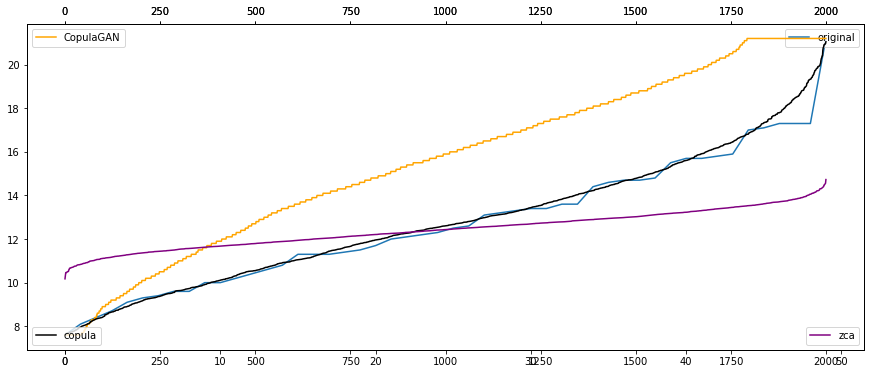

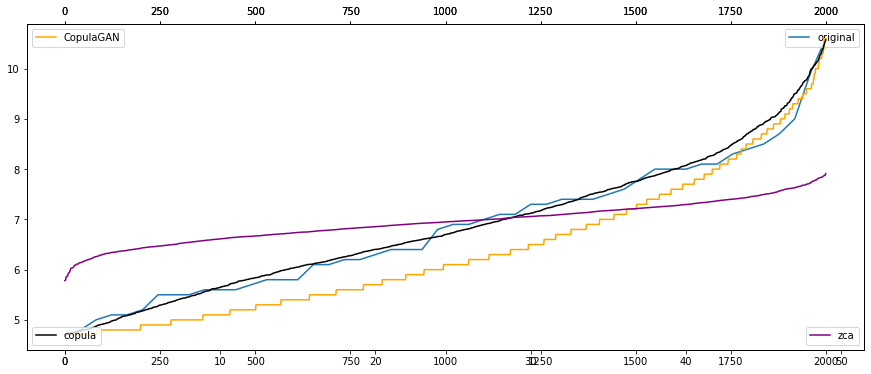

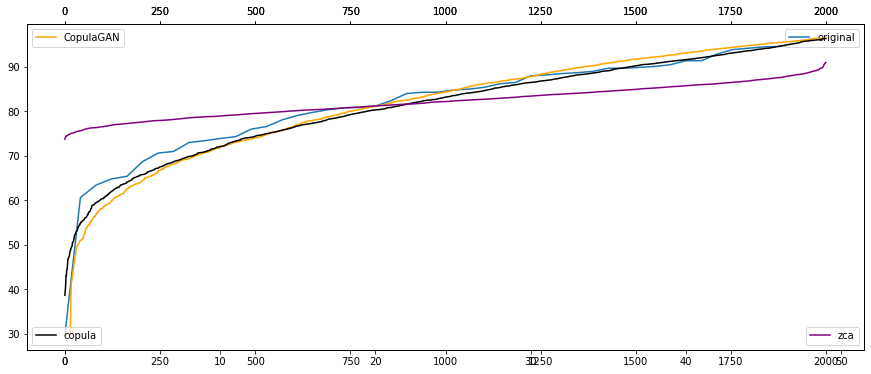

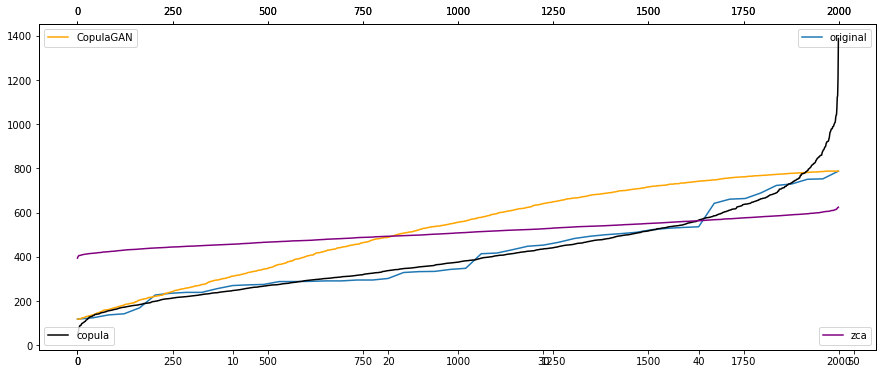

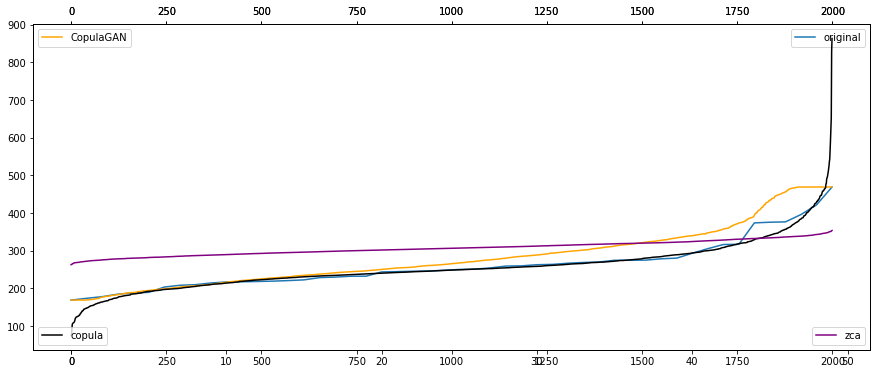

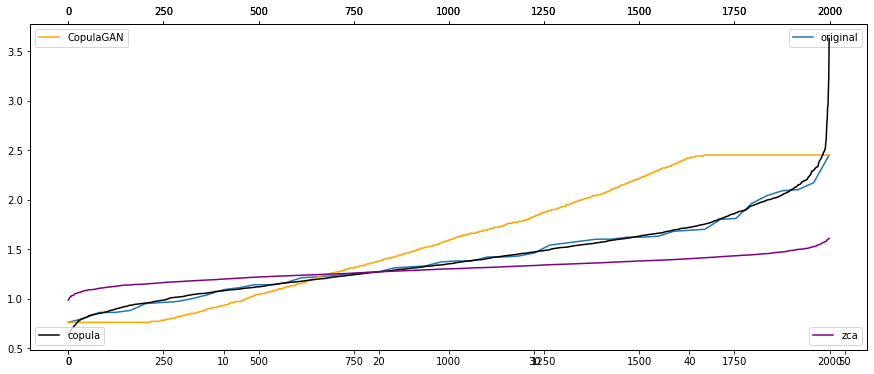

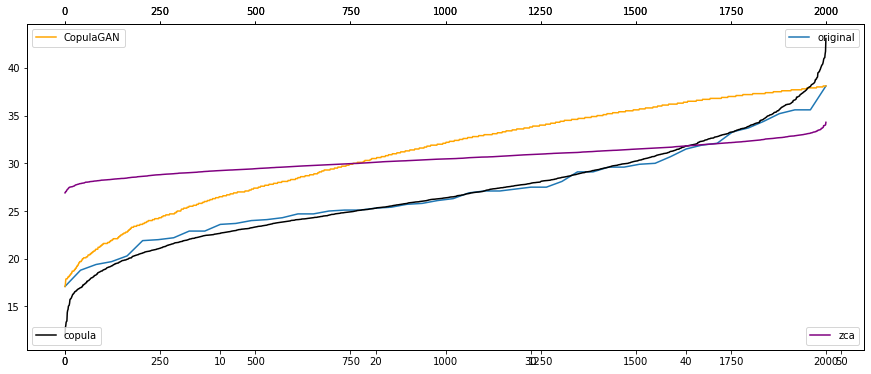

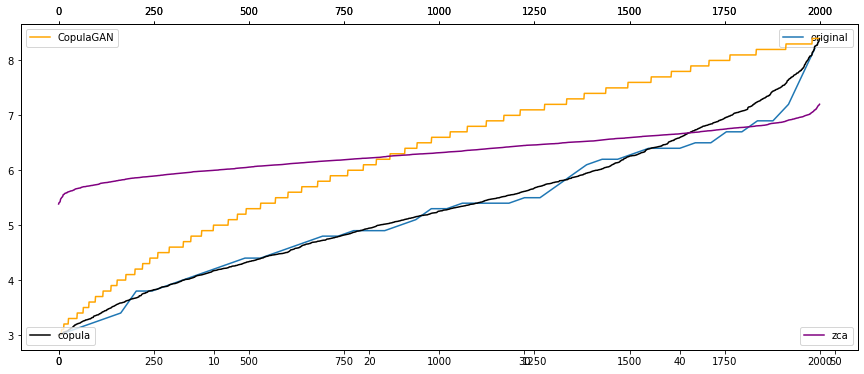

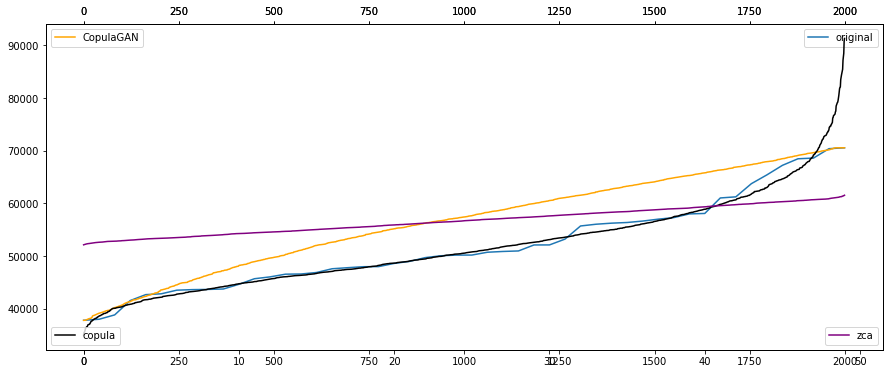

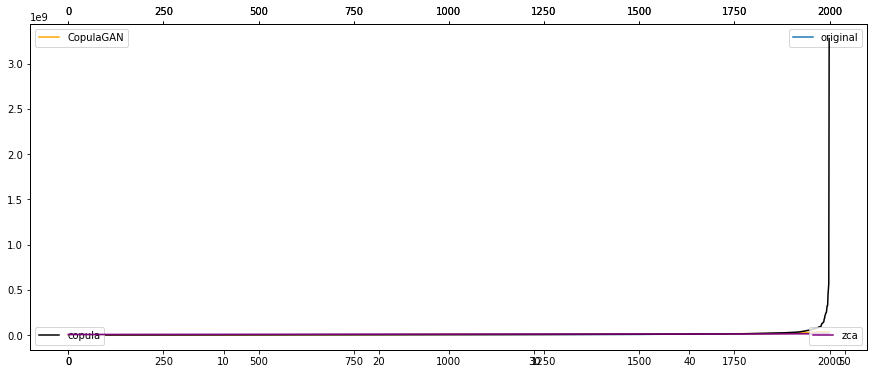

In [31]:
for x in old_data.columns:
    fig, ay1 = plt.subplots( figsize=(15,6) )

    #X1, X2 = np.random.random((2,100))
    X1 = np.array(old_data.sort_values(by=x)[x])
    X2 = np.array(copulaGAN_data.sort_values(by=x)[x])
    X3 = np.array(copula_data.sort_values(by=x)[x])
    X4 = np.array(zca_transformed.sort_values(by=x)[x])
    
    ay2 = ay1.twiny()
    
    ay3 = ay2.twiny()
    
    ay4 = ay1.twiny()
    
    l1 = ay1.plot( range(len(X1)), X1)
    l2 = ay2.plot( range(len(X2)), X2, color='orange' )
    l3 = ay3.plot( range(len(X3)), X3, color='black' )
    l4 = ay4.plot( range(len(X4)), X4, color='purple' )
    
    ay1.legend(labels=['original'],loc=1)
    ay2.legend(labels=['CopulaGAN'],loc=2)
    ay3.legend(labels=['copula'],loc=3)
    ay4.legend(labels=['zca'],loc=4)
    
    plt.plot()

In [ ]:
new_data.describe()

NameError: name 'new_data' is not defined

In [ ]:
data.corr()

In [ ]:
data.describe()

In [ ]:
#synthetic_data.corr()

In [ ]:
#synthetic_data.describe()